In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X = np.array([
    [0, 0],
    [1, 1],
    [0, 1],
    [1, 0]
])
y = [0, 0,1, 1]

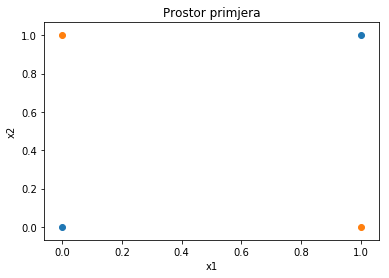

In [7]:
plt.scatter(X[:2, 0], X[:2, 1])
plt.scatter(X[2:, 0], X[2:, 1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Prostor primjera')
plt.show()

In [9]:
c1 = X[1]
c1

array([1, 1])

In [10]:
c2 = X[0]
c2

array([0, 0])

In [11]:
rbf_1 = lambda x: np.exp(-np.linalg.norm(x - c1) ** 2)
rbf_2 = lambda x: np.exp(-np.linalg.norm(x - c2) ** 2)

transformation = lambda x: np.array([rbf_1(x), rbf_2(x)])

In [12]:
Y = np.apply_along_axis(transformation, 1, X)

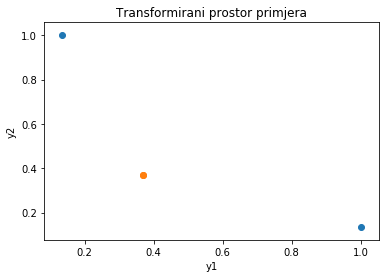

In [13]:
plt.scatter(Y[:2, 0], Y[:2, 1])
plt.scatter(Y[2:, 0], Y[2:, 1])
plt.xlabel('y1')
plt.ylabel('y2')
plt.title('Transformirani prostor primjera')
plt.show()

In [15]:
from sklearn.svm import LinearSVC

In [16]:
model = LinearSVC()
model.fit(Y, y)
print('Decision function in transformed space:')
print(
    f"{round(model.coef_[0, 0], 2)} * y1 + {round(model.coef_[0, 1], 2)} * y2 + {round(model.intercept_[0], 2)} = 0"
)

Decision function in transformed space:
-0.52 * y1 + -0.52 * y2 + 0.43 = 0


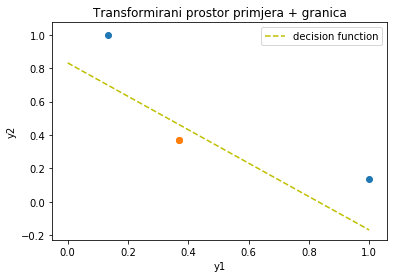

In [17]:
decision_fn = lambda x : (model.coef_[0, 0] * x + model.intercept_[0])/ - model.coef_[0, 1]
x = np.linspace(0, 1, 100)
plt.plot(x, np.apply_along_axis(decision_fn, 0, x), '--y', label="decision function")
plt.scatter(Y[:2, 0], Y[:2, 1])
plt.scatter(Y[2:, 0], Y[2:, 1])
plt.xlabel('y1')
plt.ylabel('y2')
plt.title('Transformirani prostor primjera + granica')
plt.legend()
plt.show()